In [ ]:
print("Hola mundo")

Hola mundo


In [ ]:
pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
arviz==0.11.2
astor==0.8.1
astropy==4.2.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.3.0
blis==0.4.1
bokeh==2.3.2
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.2.2
catalogue==1.0.0
certifi==2020.12.5
cffi==1.14.5
cftime==1.4.1
chainer==7.4.0
chardet==3.0.4
click==8.0.0
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.23
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.3
distributed==1.25.3
dlib==19.18.0
dm-tree==0.1.6
docopt

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('./iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data["Species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

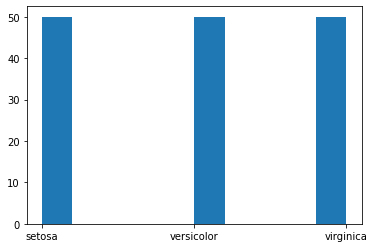

In [ ]:
plt.hist(data.Species)

In [ ]:
colnames = data.columns.values.tolist()
predictors = colnames[ :4]
tagert = colnames[4]


In [ ]:
print(predictors)

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']


In [ ]:
print(tagert)

Species


In [ ]:
import numpy as np


In [ ]:
data["is train"] = np.random.uniform(0,1, len(data)) <=0.75

In [ ]:
data.head

<bound method NDFrame.head of      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species  is train
0             5.1          3.5           1.4          0.2     setosa      True
1             4.9          3.0           1.4          0.2     setosa      True
2             4.7          3.2           1.3          0.2     setosa     False
3             4.6          3.1           1.5          0.2     setosa     False
4             5.0          3.6           1.4          0.2     setosa      True
..            ...          ...           ...          ...        ...       ...
145           6.7          3.0           5.2          2.3  virginica      True
146           6.3          2.5           5.0          1.9  virginica     False
147           6.5          3.0           5.2          2.0  virginica      True
148           6.2          3.4           5.4          2.3  virginica      True
149           5.9          3.0           5.1          1.8  virginica      True

[150 rows x 6 columns

In [ ]:
train, test =data[data["is train"] == True], data[data["is train"] == False]

In [ ]:
print(len(train))
print(len(test))

120
30


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=25, random_state=99)
tree.fit(train[predictors], train[tagert])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [ ]:
preds = tree.predict(test[predictors])

In [ ]:
print(preds)

['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'virginica' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica']


In [ ]:
pd.crosstab(test[tagert], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,13,0,0
versicolor,0,7,0
virginica,0,0,10


In [ ]:
print(3/45)

0.06666666666666667


In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
with open("./iris_dtree.dot", "w") as dotfile:
  export_graphviz(tree, out_file= dotfile, feature_names = predictors)
  dotfile.close()

In [ ]:
import os
from graphviz import Source

In [ ]:
file = open("./iris_dtree.dot", "r")
text = file.read()
print(text)

digraph Tree {
node [shape=box] ;
0 [label="Petal.Length <= 2.6\nentropy = 1.582\nsamples = 120\nvalue = [37, 43, 40]"] ;
1 [label="entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Petal.Width <= 1.75\nentropy = 0.999\nsamples = 83\nvalue = [0, 43, 40]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="Petal.Length <= 4.95\nentropy = 0.426\nsamples = 46\nvalue = [0, 42, 4]"] ;
2 -> 3 ;
4 [label="Petal.Width <= 1.65\nentropy = 0.165\nsamples = 41\nvalue = [0, 40, 1]"] ;
3 -> 4 ;
5 [label="entropy = 0.0\nsamples = 40\nvalue = [0, 40, 0]"] ;
4 -> 5 ;
6 [label="entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]"] ;
4 -> 6 ;
7 [label="entropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]"] ;
3 -> 7 ;
8 [label="Petal.Length <= 4.85\nentropy = 0.179\nsamples = 37\nvalue = [0, 1, 36]"] ;
2 -> 8 ;
9 [label="entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]"] ;
8 -> 9 ;
10 [label="entropy = 0.0\nsamples = 34

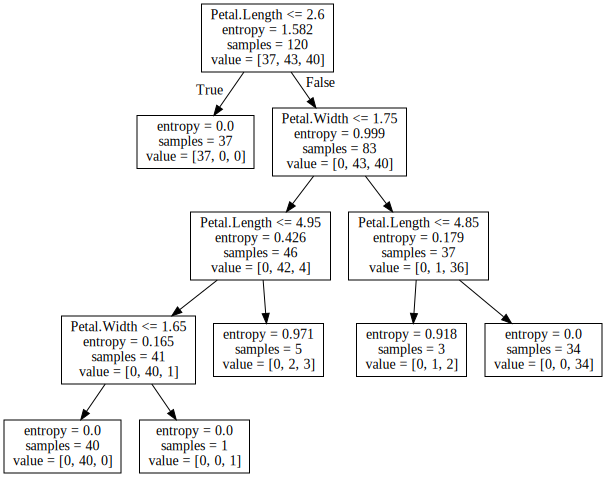

In [ ]:
Source(text)